# 1. Data  Cleaning and Preprocessing

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:/Users/snega/Downloads/Algerian_forest_fires_cleaned.csv")
print(df.head())

# Dataset Description
print(df.info())
print(df.describe())
print(df.isnull().sum())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  


In [4]:
#Handling erros
df.dropna(inplace=True) 
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [5]:
## Feature Selection adn Engineering
# Drop unnecessary columns
df = df.drop(columns=['day', 'month', 'year', 'Classes', 'Region'])
print(df.head())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5


## 2. Data Visualization and Observations

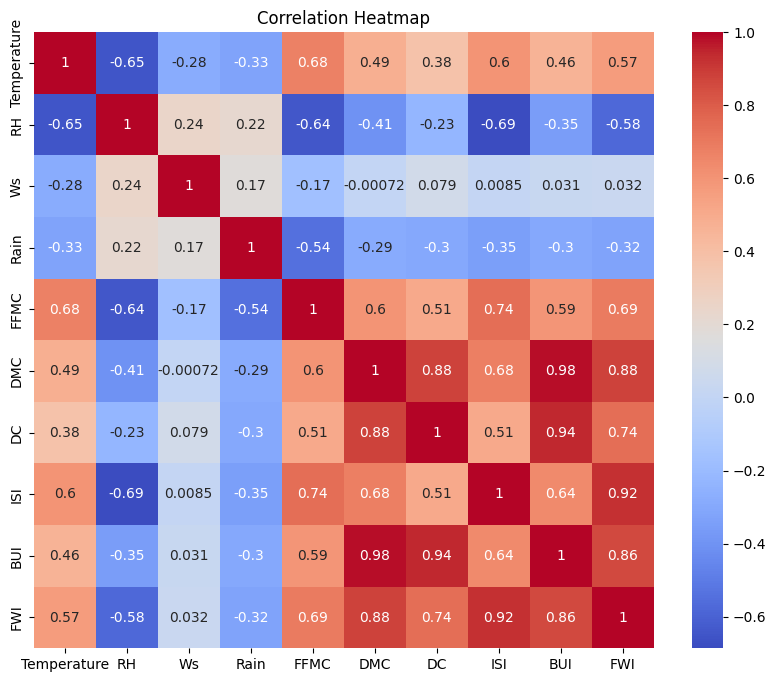

In [6]:
#Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

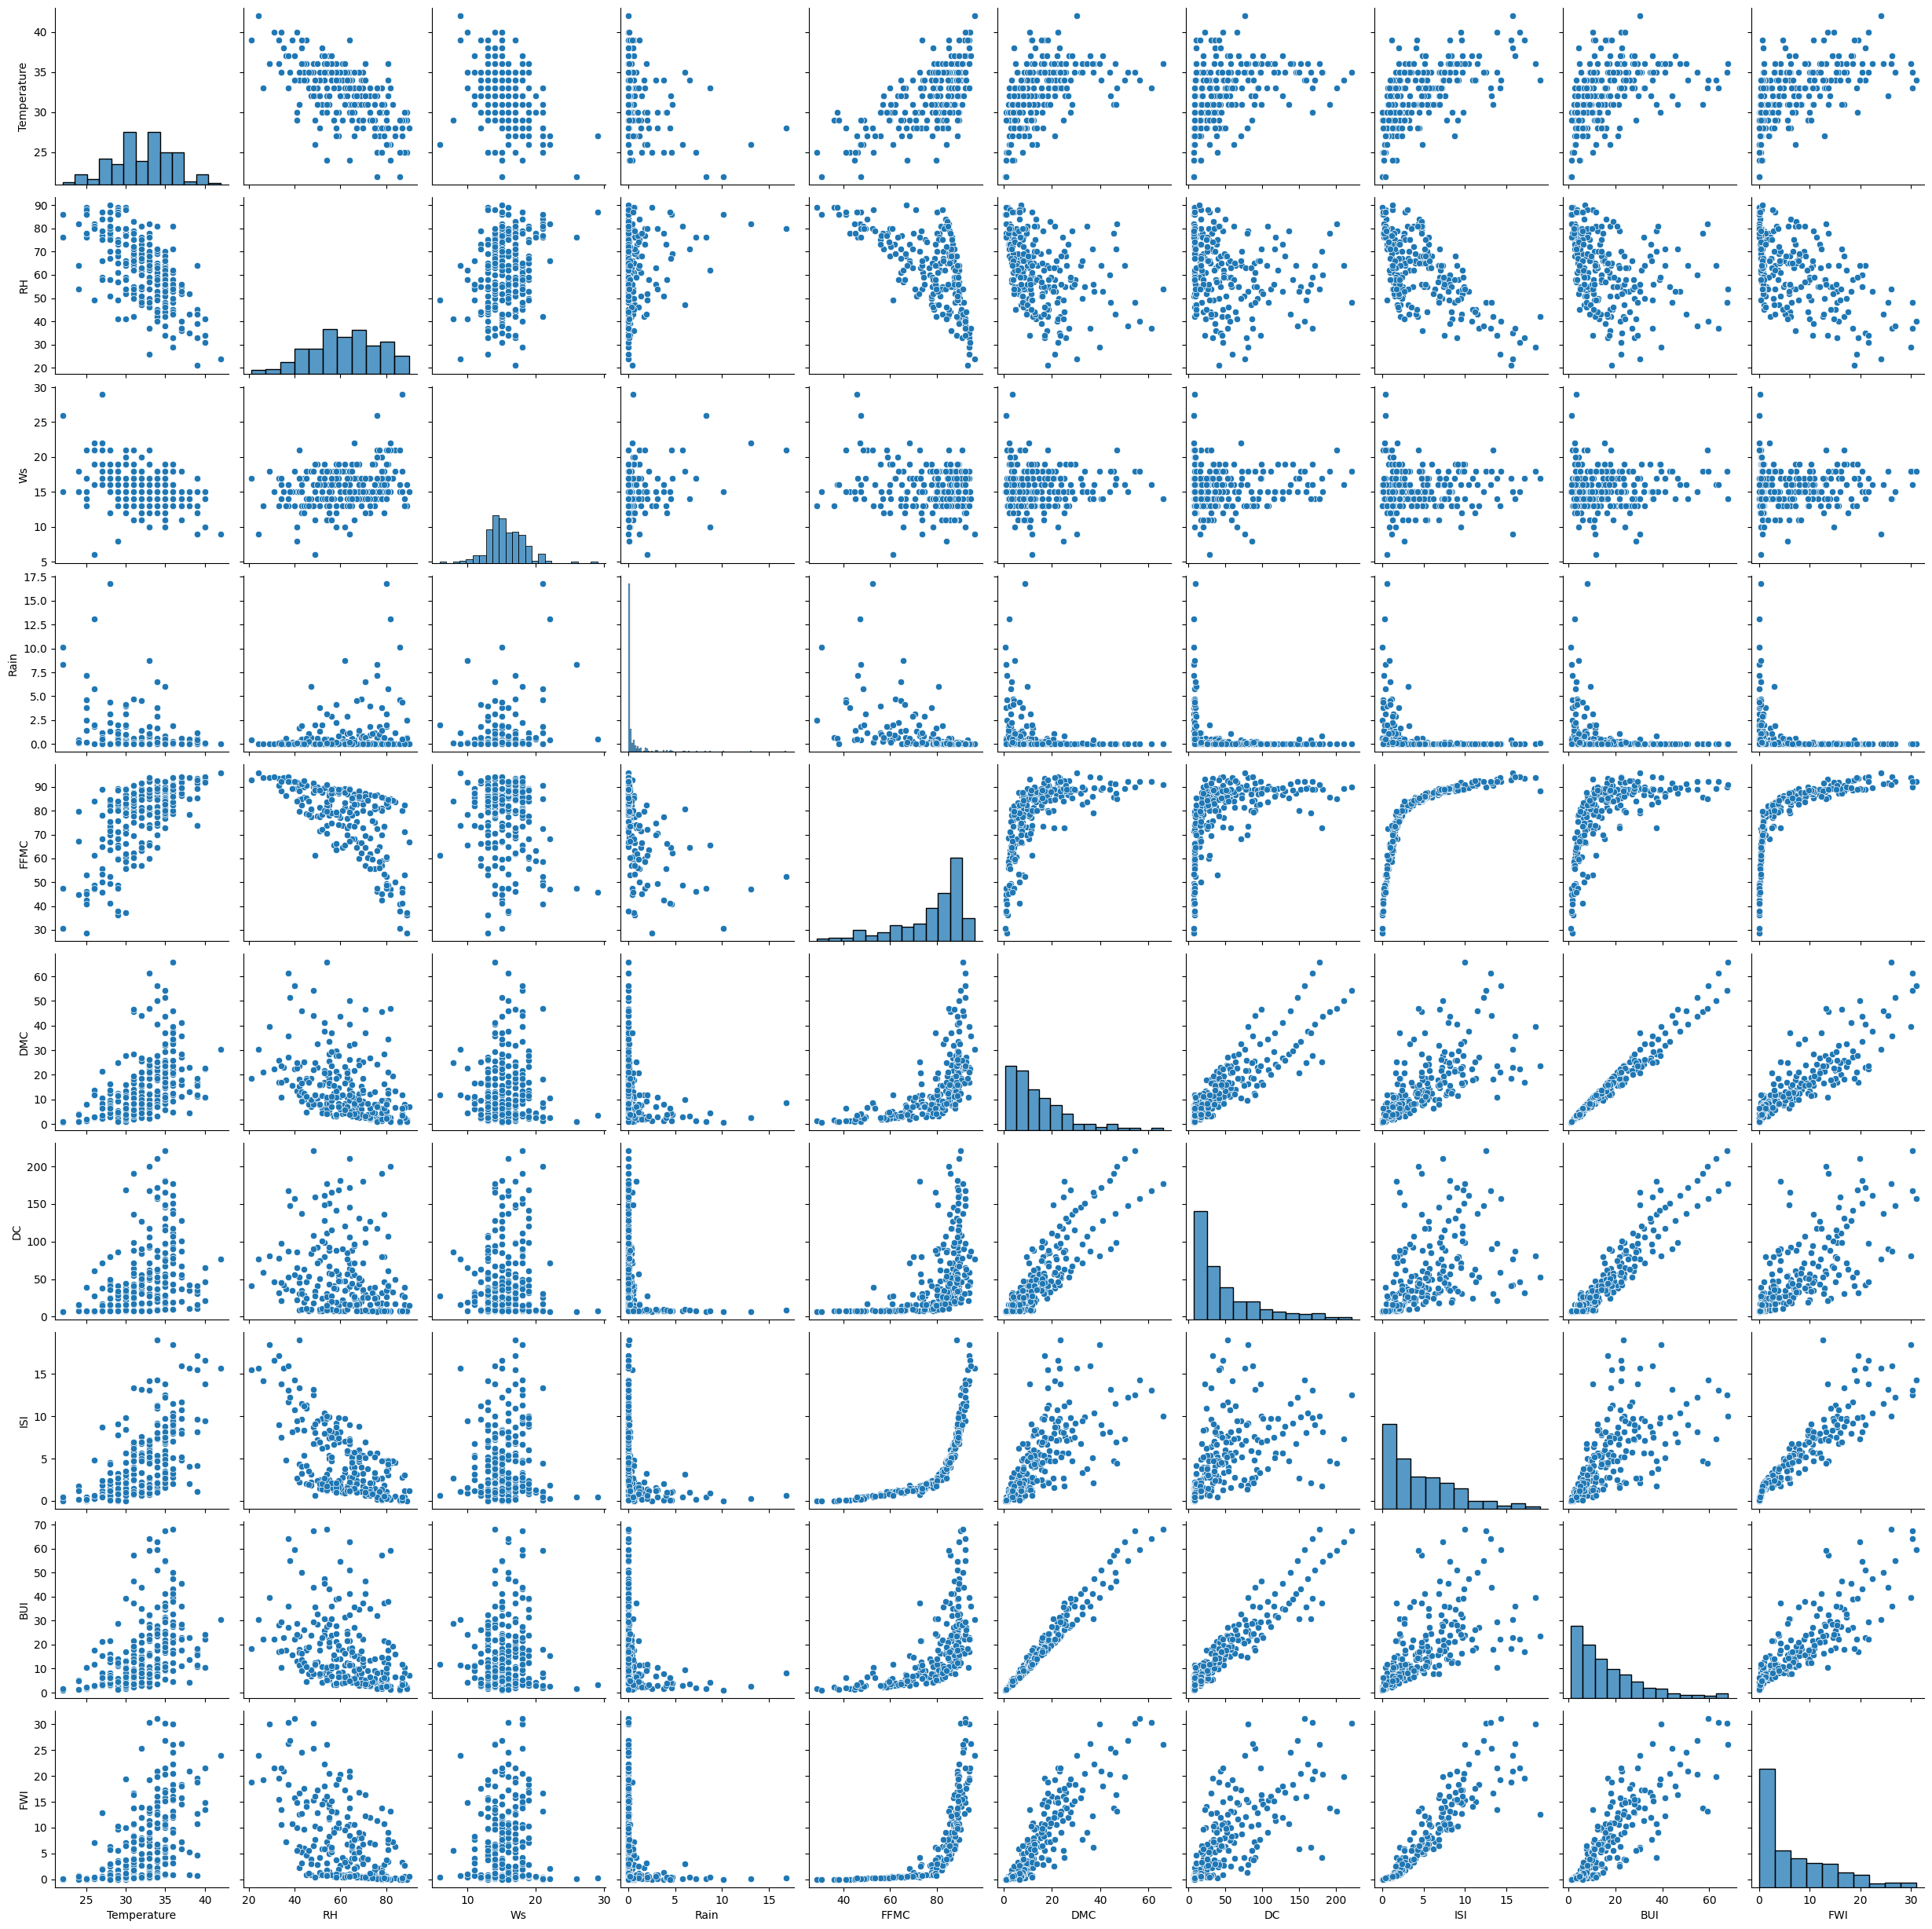

In [7]:
# Pairplot for more detailed observation
sns.pairplot(df)
plt.show()

CONCLUSIONS FROM THE VISUALIZATION

 Looking at both the graphs, There are some key correlations between the FWI (Fire Weather Index) and other variables:
   1. ISI (0.92): Strongest positive correlation with FWI. It makes sense since the Initial Spread Index is tied directly to how quickly a fire spreads.
   2. BUI (0.86) and DMC (0.88): Both show strong positive correlations. More fuel available (BUI) and drier conditions (DMC) mean higher fire risk.
   3. FFMC (0.69): Higher FFMC values, which indicate drier fine fuels, also lead to increased fire risk.
   4. DC (0.74): Drought conditions correlate positively with fire risk, which is expected.
   5. Temperature (0.57): Warmer temperatures boost fire risk.
   6. RH (-0.58): Higher humidity lowers fire risk, as expected.
   7. Rain (-0.32): Rain decreases fire risk, though not as strongly as humidity.
   8. Wind speed (0.032): Wind speed has little correlation with FWI here.
 From this, ISI, BUI, DMC, FFMC, DC, Temperature, and RH are key features for the regression models. These features show the strongest relationships with FWI.


### 3. MODEL DEVELOPMENT AND ANALYSIS

In [9]:
from sklearn.model_selection import train_test_split

# Spliting the features and target variable
X = df.drop(columns=['FWI', 'Rain', 'Ws'])   # Features
y = df['FWI']  # Target variable

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(194, 7) (49, 7) (194,) (49,)


        MULTIPLE LINEAR REGRESSION

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
print(y_pred_linear)

# Evaluate the model's performance
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))

[ 8.03239467e+00  7.08175669e+00  1.76573117e-01  5.57574180e+00
  6.45216721e+00  1.59329394e+00  2.25440637e+00  7.21788305e+00
  1.92949202e+00  3.30731464e+00  2.44997241e-01  6.87379032e+00
  9.43748796e+00  1.64317973e+01  1.91157635e+01  1.63834861e+00
  1.88771828e+00 -3.65254938e-01  6.44982446e+00  2.91863766e+00
  1.54357119e+00  1.96210328e-01  6.05526278e+00  6.22842959e-02
  2.12919754e+01  4.76274641e+00  5.48399010e+00  9.74243297e+00
 -2.96491449e-01  9.82394910e+00  6.12473674e+00 -3.51607519e-02
  1.00856110e+01  1.49571639e+01  1.39211591e+00  9.76276921e-01
  1.46873487e+00  5.90202444e+00 -1.61164627e-01 -1.93316036e-02
  6.64747161e+00  1.54468413e+00  7.98294391e+00 -6.02728062e-01
  1.52146645e+01  7.59745449e+00  7.74665140e+00  9.40735299e-01
  1.25507398e+01]
Linear Regression R²: 0.9899286033745968
Linear Regression MSE: 0.30524813392621303


        Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features to polynomial
poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_poly_test)
print(y_pred_poly)

# Evaluate the polynomial model
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))

[ 8.03239467e+00  7.08175669e+00  1.76573117e-01  5.57574180e+00
  6.45216721e+00  1.59329394e+00  2.25440637e+00  7.21788305e+00
  1.92949202e+00  3.30731464e+00  2.44997241e-01  6.87379032e+00
  9.43748796e+00  1.64317973e+01  1.91157635e+01  1.63834861e+00
  1.88771828e+00 -3.65254938e-01  6.44982446e+00  2.91863766e+00
  1.54357119e+00  1.96210328e-01  6.05526278e+00  6.22842959e-02
  2.12919754e+01  4.76274641e+00  5.48399010e+00  9.74243297e+00
 -2.96491449e-01  9.82394910e+00  6.12473674e+00 -3.51607519e-02
  1.00856110e+01  1.49571639e+01  1.39211591e+00  9.76276921e-01
  1.46873487e+00  5.90202444e+00 -1.61164627e-01 -1.93316036e-02
  6.64747161e+00  1.54468413e+00  7.98294391e+00 -6.02728062e-01
  1.52146645e+01  7.59745449e+00  7.74665140e+00  9.40735299e-01
  1.25507398e+01]
Polynomial Regression R²: 0.9899286033745968
Polynomial Regression MSE: 0.3052481339262146


        Regularization: Lasso and Ridge Regression

In [12]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Standardize the features for Lasso and Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the Lasso model
print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the Ridge model
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))

Lasso Regression R²: 0.9527917787942851
Lasso Regression MSE: 1.4308066661453152
Ridge Regression R²: 0.9828938758747501
Ridge Regression MSE: 0.5184596200662162


        Cross-Validation

In [13]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Lasso
lasso_cv = GridSearchCV(Lasso(), param_grid={'alpha': [0.01, 0.1, 0.5, 10]}, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha for Lasso
print("Best Lasso Alpha:", lasso_cv.best_params_)

# Hyperparameter tuning for Ridge
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': [0.001, 0.01, 0.1, 1]}, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Best alpha for Ridge
print("Best Ridge Alpha:", ridge_cv.best_params_)

Best Lasso Alpha: {'alpha': 0.1}
Best Ridge Alpha: {'alpha': 1}


        Hyperparameter Tuning

In [14]:
## Tuning the Lasso Model

# Train a Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the Lasso model
print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

## Tuning the Ridge Model

# Train a Ridge model
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Lasso model
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))

Lasso Regression R²: 0.9822607522345805
Lasso Regression MSE: 0.5376485982084173
Ridge Regression R²: 0.9828938758747501
Ridge Regression MSE: 0.5184596200662162


#### 4. Model Evaluation and Testing

        Evaluating Model Performance

In [15]:
#Comparing all the models
model_performance = {}
model_performance['Linear Regression'] = {'R2': r2_score(y_test, y_pred_linear),
                                          'Mean_squared_error': mean_squared_error(y_test, y_pred_linear)}
model_performance['Polynomial Regression'] = {'R2': r2_score(y_test, y_pred_poly),
                                          'Mean_squared_error': mean_squared_error(y_test, y_pred_poly)}
model_performance['Lasso Regression'] = {'R2': r2_score(y_test, y_pred_lasso),
                                          'Mean_squared_error': mean_squared_error(y_test, y_pred_lasso)}
model_performance['Ridge Regression'] = {'R2': r2_score(y_test, y_pred_ridge),
                                          'Mean_squared_error': mean_squared_error(y_test, y_pred_ridge)}

# Display Model Performance
performance_df = pd.DataFrame(model_performance).T
print(performance_df)



                             R2  Mean_squared_error
Linear Regression      0.989929            0.305248
Polynomial Regression  0.989929            0.305248
Lasso Regression       0.982261            0.537649
Ridge Regression       0.982894            0.518460


        Saving the Models with Pickle

In [29]:
import pickle

# Save the trained models using pickle
with open('linear_model.pkl=', 'wb') as f:
    pickle.dump(linear_model, f)

with open('poly_model.pkl', 'wb') as f:
    pickle.dump(poly_model, f)

with open('poly_features.pkl','wb') as f:
    pickle.dump(poly, f)

with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)


In [17]:
import os
print(os.listdir()) 

['Assignment 1.ipynb', 'lasso_model.pkl', 'linear_model.pkl=', 'poly_model.pkl', 'ridge_model.pkl']


        Loading the models from Pickle files

In [32]:
with open('linear_model.pkl=', 'rb') as f:
    loaded_linear_model = pickle.load(f)

with open('poly_model.pkl', 'rb') as f:
    loaded_poly_model = pickle.load(f)

with open('poly_features.pkl', 'rb') as f:
    loaded_poly= pickle.load(f)

with open('ridge_model.pkl', 'rb') as f:
    loaded_ridge_model = pickle.load(f)

with open('lasso_model.pkl', 'rb') as f:
    loaded_lasso_model = pickle.load(f)

        Testing on the unseen data

In [35]:
Unseen_df = np.array([[33, 37.9, 2.7, 12.1, 0.6, 4.2, 0.7]]) 

#Making Predicions using unseen data
linear_pred = loaded_linear_model.predict(Unseen_df)
print("FWI Prediction using Loaded Linear Regression: ", linear_pred[0])

#Polynomial Regrression Prediction
loaded_poly.fit(Unseen_df)
Unseen_df_poly = loaded_poly.transform(Unseen_df) 
poly_pred = loaded_poly_model.predict(Unseen_df_poly)
print("FWI Prediction using Loaded Polynomial Regression: ", poly_pred[0])

# Ridge Regression Prediction
ridge_pred = loaded_ridge_model.predict(Unseen_df)
print("FWI Prediction using Loaded Ridge Regression: ", ridge_pred[0])

# Lasso Regression Prediction
lasso_pred = loaded_lasso_model.predict(Unseen_df)
print("FWI Prediction using Loaded Lasso Regression: ", lasso_pred[0])

FWI Prediction using Loaded Linear Regression:  6.466975463114174
FWI Prediction using Loaded Polynomial Regression:  6.466975463114211
FWI Prediction using Loaded Ridge Regression:  41.99357402645853
FWI Prediction using Loaded Lasso Regression:  41.97146880272524


d:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


CONCLUSIONS FROM THE UNSEEN DATA PREDICTIONS:

1. Linear and Polynomial Regression provide similar, low predictions (~6.467), which suggests a simple or weak relationship between the input features and the target variable in those models.
2. Ridge and Lasso Regression produce much higher predictions (~42), likely due to the influence of regularization, which may be emphasizing different features or penalizing feature coefficients differently compared to the unregularized linear and polynomial models.